In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#Read the dataset to python environment

In [9]:
data=pd.read_excel(r'C:\Users\ADMIN\OneDrive\Desktop\New folder\New folder\iris assignment data.xls')

In [11]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
data.shape

(150, 5)

In [13]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
#Do the necessary pre-processing steps

In [16]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [17]:
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [18]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Boxplot for SL')

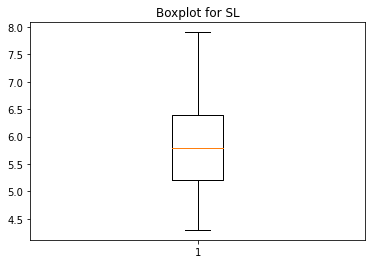

In [19]:
plt.boxplot(data['SL'])
plt.title('Boxplot for SL')

Text(0.5, 1.0, 'Boxplot for SW')

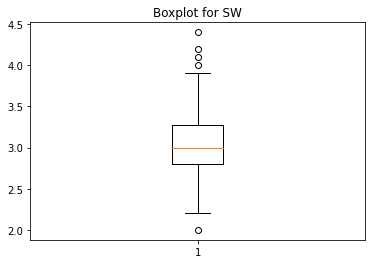

In [20]:
plt.boxplot(data['SW'])
plt.title('Boxplot for SW')

Text(0.5, 1.0, 'Boxplot for PL')

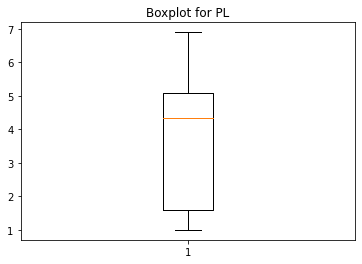

In [21]:
plt.boxplot(data['PL'])
plt.title('Boxplot for PL')

Text(0.5, 1.0, 'Boxplot for PW')

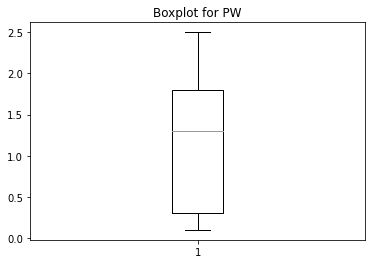

In [22]:
plt.boxplot(data['PW'])
plt.title('Boxplot for PW')

In [23]:
q1 = np.percentile(data['SW'], 25)
q2 = np.percentile(data['SW'], 50)
q3 = np.percentile(data['SW'], 75)

In [24]:
iqr=q3-q1

In [25]:
low_limit = q1 - 1.5*iqr
upr_limit = q3 + 1.5*iqr

In [26]:
low_limit

2.0874999999999995

In [27]:
upr_limit

3.9875

In [28]:
data.loc[(data['SW']>upr_limit) | (data['SW']<low_limit)]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [29]:
new_data=data.loc[(data['SW']<upr_limit) & (data['SW']>low_limit)]

In [30]:
new_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [31]:
print('before removing outliers:',len(data))

before removing outliers: 150


In [32]:
print('after removing outliers:',len(new_data))

after removing outliers: 145


In [33]:
print('outliers:',len(data)-len(new_data))

outliers: 5


Text(0.5, 1.0, 'Box plot of SW')

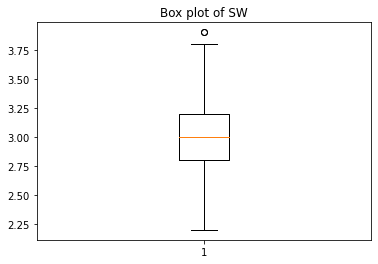

In [34]:
plt.boxplot(new_data['SW'])
plt.title('Box plot of SW')

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_data['Classification']=le.fit_transform(new_data['Classification'])
new_data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12752\1860925382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Classification']=le.fit_transform(new_data['Classification'])


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [36]:
corr_matrix=data.corr()

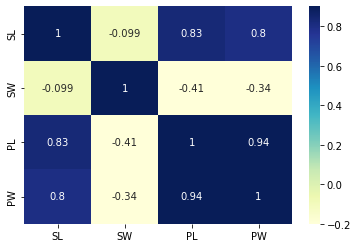

In [37]:
sns.heatmap(corr_matrix,vmin=-0.2,vmax=0.9,annot=True,cmap='YlGnBu')
plt.show()

In [38]:
#Logistic regression 
x=new_data.drop(['Classification'],axis=1)
y=new_data['Classification']

In [39]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [40]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 145, dtype: int32

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)

F:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
y_predictions=model.predict(x_test)

In [44]:
y_predictions

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2])

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [46]:
confusion_matrix(y_test,y_predictions)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [47]:
print('Accuracy= ',accuracy_score(y_test,y_predictions))
print('Precision= ',precision_score(y_test,y_predictions,average='weighted'))
print('Recall= ',recall_score(y_test,y_predictions,average='weighted'))
print('F1_score= ',f1_score(y_test,y_predictions,average='weighted'))

Accuracy=  0.9310344827586207
Precision=  0.9310344827586207
Recall=  0.9310344827586207
F1_score=  0.9310344827586207


In [48]:
#kNN
from sklearn.neighbors import KNeighborsClassifier

In [49]:
metric_k=[]
neighbors=np.arange(3,15)

In [50]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [51]:
metric_k

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

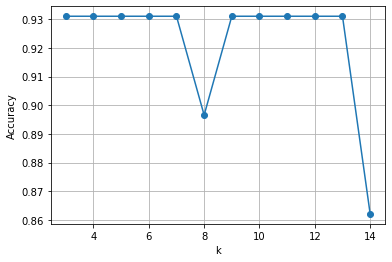

In [52]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [53]:
classifier=KNeighborsClassifier(n_neighbors= 6,metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

In [54]:
print('Accuracy= ',accuracy_score(y_test,y_predictions))
print('Precision= ',precision_score(y_test,y_predictions,average='weighted'))
print('Recall= ',recall_score(y_test,y_predictions,average='weighted'))
print('F1_score= ',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)                      

Accuracy=  0.9310344827586207
Precision=  0.9310344827586207
Recall=  0.9310344827586207
F1_score=  0.9310344827586207


array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [55]:
#SVM
from sklearn.model_selection import train_test_split      
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
y_pred=svmclf.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix                                    #some mistake
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  0.896551724137931


In [58]:
print(confusion_matrix(y_test,y_pred))

[[9 0 0]
 [0 8 1]
 [0 2 9]]


In [59]:
#Decision tree 
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred=dt_clf.predict(x_test)

In [61]:
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  0.896551724137931


In [62]:
print(confusion_matrix(y_test,y_pred))

[[9 0 0]
 [0 8 1]
 [0 2 9]]


In [63]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
y_pred=rf_clf.predict(x_test)

In [65]:
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  0.896551724137931


In [66]:
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [67]:
y_pred=rf_clf1.predict(x_test)

In [68]:
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  0.9310344827586207


In [ ]:
#Taking accuracy values of all the models Logistic regression and kNN models have the best accuracy.